# Exploratory Analysis of Diabetes Dataset

## Abstract

The file diabetic_data.csv contains the raw data. The data is comprised of 100,000 rows, each of which captures data about an inpatient diabetic encounter. 

-- Diabetic encounter based on the diagnoses entered
-- The length of stay was at least 1 day and at most 14 days
-- Laboratory tests were performed during the encounter
-- Medications were administered during the encounter

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical 
specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, 
diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization,etc.

*Coding of categorical Data*

admission_type_id	description
1                 -   Emergency
2                 -   Urgent
3                 -   Elective
4                 -   Newborn
5                 -   Not Available
6                 -   NULL
7                 -   Trauma Center
8                 -   Not Mapped

discharge_disposition_id	description
1                 -           Discharged to home
2                 -           Discharged/transferred to another short term hospital
3                 -           Discharged/transferred to SNF
4                 -           Discharged/transferred to ICF
5                 -           Discharged/transferred to another type of inpatient care institution
6                 -           Discharged/transferred to home with home health service
7                 -           Left AMA
8                 -           Discharged/transferred to home under care of Home IV provider
9                 -           Admitted as an inpatient to this hospital
10                -            Neonate discharged to another hospital for neonatal aftercare
11                -            Expired
12                -            Still patient or expected to return for outpatient services
13                -            Hospice / home
14                -            Hospice / medical facility
15                -            Discharged/transferred within this institution to Medicare approved swing bed
16                -            Discharged/transferred/referred another institution for outpatient services
17                -            Discharged/transferred/referred to this institution for outpatient services
18                -            NULL
19                -            Expired at home. Medicaid only, hospice.
20                -            Expired in a medical facility. Medicaid only, hospice.
21                -            Expired, place unknown. Medicaid only, hospice.
22                -            Discharged/transferred to another rehab fac including rehab units of a hospital .
23                -            Discharged/transferred to a long term care hospital.
24                -            Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25                            Not Mapped
26                -            Unknown/Invalid
30                -            Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27                -            Discharged/transferred to a federal health care facility.
28                -            Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29                -            Discharged/transferred to a Critical Access Hospital (CAH).

admission_source_id		description
1                 -       Physician Referral
2                 -       Clinic Referral
3                 -       HMO Referral
4                 -       Transfer from a hospital
5                 -       Transfer from a Skilled Nursing Facility (SNF)
6                 -       Transfer from another health care facility
7                 -       Emergency Room
8                 -       Court/Law Enforcement
9                 -       Not Available
10                -       Transfer from critial access hospital
11                -       Normal Delivery
12                -       Premature Delivery
13                -       Sick Baby
14                -       Extramural Birth
15                -       Not Available
17                -       NULL
18                -       Transfer From Another Home Health Agency
19                -       Readmission to Same Home Health Agency
20                -       Not Mapped
21                -       Unknown/Invalid
22                -       Transfer from hospital inpt/same fac reslt in a sep claim
23                -       Born inside this hospital
24                -       Born outside this hospital
25                -       Transfer from Ambulatory Surgery Center
26                -       Transfer from Hospice

*Report Sections*
**Cleaning the Data**
**Exploratory Analyses**
**Statistical Analysis**
**Results**

Exploratory Analyses:
This report find the frequency of distributions of various fields. 
It finds correlations between numeric fields. Please note that the id values are not numerical data. They are categorical values encoded as numeric.

This report explores 4 hypothesis:
1. Independence between A1c Results and age
2. Independence between A1c Results and race
3. Time spent in hospital between the different types of admit groups is different across the way patients were admitted
4. Test whether the time spent in hospital between the 8 different medical specialties is different across groups

## View the Data Set


In [491]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pylatex
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

%matplotlib inline

In [492]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 20

In [493]:
diabetes = pd.read_csv('diabetic_data.csv')
column_names = list(diabetes.columns.values)
print "There are %d columns in this data" %len(column_names)
print "Column names: \n", column_names
print "There are %d rows in this data" %diabetes.shape[0]

There are 50 columns in this data
Column names: 
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
There are 101766 rows in this data


We will now look at the column data types and see if there are any null values in any columns

In [494]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [495]:
#Checking which columns have null values
for col in column_names:
    print col, ": ", diabetes[col].isnull().values.any()

encounter_id :  False
patient_nbr :  False
race :  False
gender :  False
age :  False
weight :  False
admission_type_id :  False
discharge_disposition_id :  False
admission_source_id :  False
time_in_hospital :  False
payer_code :  False
medical_specialty :  False
num_lab_procedures :  False
num_procedures :  False
num_medications :  False
number_outpatient :  False
number_emergency :  False
number_inpatient :  False
diag_1 :  False
diag_2 :  False
diag_3 :  False
number_diagnoses :  False
max_glu_serum :  False
A1Cresult :  False
metformin :  False
repaglinide :  False
nateglinide :  False
chlorpropamide :  False
glimepiride :  False
acetohexamide :  False
glipizide :  False
glyburide :  False
tolbutamide :  False
pioglitazone :  False
rosiglitazone :  False
acarbose :  False
miglitol :  False
troglitazone :  False
tolazamide :  False
examide :  False
citoglipton :  False
insulin :  False
glyburide-metformin :  False
glipizide-metformin :  False
glimepiride-pioglitazone :  False
metfo

The above codes show that the columns do not have any null/nan values. We will go ahead and sample the data now to understand if there are any other variables used to store missing values in the data. Below code will show that the weight colmn has "?". So we know that "?" has been coded for missing values.

In [496]:
diabetes.sample(10, replace=False)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
61988,172804350,87797016,Caucasian,Female,[50-60),?,1,1,7,3,BC,?,61,0,14,0,1,1,577,276,780,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
91619,311453858,136179122,Hispanic,Female,[20-30),?,1,1,7,8,MD,?,65,1,20,0,0,1,250.6,599,296,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
70500,202391592,28788570,Caucasian,Male,[40-50),?,2,1,7,3,OG,Emergency/Trauma,41,0,10,0,0,0,786,682,785,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
92071,317314400,101946816,Caucasian,Male,[70-80),?,3,6,1,8,MC,?,68,6,41,1,0,0,414,411,428,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
58853,166260174,92831571,Caucasian,Female,[60-70),?,5,1,1,1,MC,?,36,0,6,3,0,0,414,242,413,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
73049,215182248,43066584,Caucasian,Female,[60-70),?,1,1,7,2,PO,?,28,0,10,0,0,0,491,401,250,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
14007,55106382,79259886,AfricanAmerican,Female,[60-70),?,1,1,7,6,?,InternalMedicine,55,6,19,0,0,0,414,411,458,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
65665,183191076,41133231,Caucasian,Male,[80-90),?,3,6,1,1,MC,?,36,1,1,1,0,0,536,276,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
50624,151843554,87963093,Caucasian,Female,[90-100),?,1,3,7,4,MC,?,55,2,29,1,0,0,820,285,428,9,None,None,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
56144,161547972,42043050,Caucasian,Male,[50-60),?,1,1,7,1,SP,?,62,0,14,0,0,0,250.02,276,V45,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [497]:
diabetes[diabetes["weight"] != "?"].sample(10, replace = False)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38870,120891630,58261860,Caucasian,Female,[80-90),[75-100),3,3,1,3,MC,Surgery-General,14,1,21,1,0,0,715,424,733,7,None,None,Steady,No,No,No,No,No,Up,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
39999,124377462,77860701,?,Female,[70-80),[50-75),1,6,7,1,MC,?,72,0,7,1,0,0,276,276,8,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
19389,69161838,103030038,Caucasian,Male,[70-80),[75-100),1,1,7,2,?,?,66,6,18,2,0,2,410,996,E878,9,None,None,No,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
32018,102366534,114852780,Caucasian,Male,[60-70),[150-175),3,6,1,10,BC,Surgery-General,64,1,32,0,0,0,715,427,496,9,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
15992,60560244,99553419,Caucasian,Female,[80-90),[50-75),1,1,7,10,?,Family/GeneralPractice,45,0,14,0,0,0,435,491,428,9,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
45353,140125512,95106312,Caucasian,Male,[80-90),[75-100),3,1,1,1,UN,Cardiology,60,5,15,5,0,1,414,411,401,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
31872,102063708,57101904,Caucasian,Female,[80-90),[75-100),3,3,4,6,MC,?,32,0,12,3,0,2,V57,780,428,9,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
28064,91860816,3962403,?,Male,[70-80),[75-100),3,4,4,7,MC,Cardiology,55,3,17,0,0,0,997,410,E878,9,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
31442,100914072,79610292,Caucasian,Male,[50-60),[75-100),1,2,7,6,CP,?,66,1,11,0,1,0,204,202,284,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
70929,204459354,69172002,AfricanAmerican,Female,[40-50),[100-125),1,1,7,3,BC,Cardiology,59,0,21,0,0,0,351,424,252,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30


## Clean the Data Set

We can see that weight should be a range but it was stored as an object. Since we have encoded all missing values as nan we can change it to numeric now. Same goes for Race. To be safe let us first remove all "?" from the data and then check again

In [498]:
clean_diabetes = diabetes.replace(to_replace="?", value = np.nan)

null_columns = []
for col in column_names:
    column_nan_or_not = clean_diabetes[col].isnull().values.any()
    if column_nan_or_not == True:
        null_columns.append(col)

print "Columns with unknown/missing/junk values", null_columns

short_diab = clean_diabetes.dropna()
print short_diab.shape


Columns with unknown/missing/junk values ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
(1043, 50)


In [499]:
clean_diabetes.sample(10, replace=False)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
79243,242896974,88838019,AfricanAmerican,Female,[30-40),NaN,1,1,7,8,MC,NaN,42,1,29,0,5,3,493,276,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
33885,106591068,23216454,Caucasian,Female,[70-80),NaN,2,1,1,2,MC,InternalMedicine,37,1,11,0,1,3,789,276,562,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
30728,99171684,83581848,Caucasian,Female,[70-80),NaN,2,1,7,3,NaN,NaN,64,1,12,1,1,0,780,733,401,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
48793,148467450,86641362,Caucasian,Female,[80-90),NaN,1,6,7,5,NaN,InternalMedicine,60,3,20,0,0,0,414,411,427,9,None,Norm,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
18691,67325070,24255261,Caucasian,Female,[40-50),NaN,5,1,17,2,NaN,NaN,25,0,11,0,1,1,584,250.01,585,5,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
8770,39176772,627480,Caucasian,Male,[50-60),NaN,1,1,7,3,NaN,Psychiatry,38,0,5,0,0,0,296,250,401,3,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
77466,235195476,84886524,Caucasian,Female,[20-30),NaN,1,1,7,1,HM,NaN,64,0,9,1,1,0,250.02,401,530,5,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
39734,123529776,102279168,Caucasian,Female,[80-90),NaN,2,3,7,6,SP,Emergency/Trauma,1,0,12,0,0,1,486,707,V54,9,None,None,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
31844,101961498,24042483,Caucasian,Female,[60-70),NaN,1,1,7,4,NaN,InternalMedicine,48,3,23,0,0,0,211,280,250.02,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
79039,242016102,36611415,AfricanAmerican,Male,[50-60),NaN,1,5,7,3,MC,NaN,63,0,4,0,0,0,584,276,295,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


We can again check if the weight and race which initially showed missing values as "?" do contain any other form of such data.

We will also check the unique values in every column and check if we see any 

In [500]:
for col in null_columns:
    print col, "unique values are", np.unique(clean_diabetes[col]), "\n"

race unique values are [nan 'AfricanAmerican' 'Asian' 'Caucasian' 'Hispanic' 'Other'] 

weight unique values are [nan '>200' '[0-25)' '[100-125)' '[125-150)' '[150-175)' '[175-200)'
 '[25-50)' '[50-75)' '[75-100)'] 

payer_code unique values are [nan 'BC' 'CH' 'CM' 'CP' 'DM' 'FR' 'HM' 'MC' 'MD' 'MP' 'OG' 'OT' 'PO' 'SI'
 'SP' 'UN' 'WC'] 

medical_specialty unique values are [nan 'AllergyandImmunology' 'Anesthesiology' 'Anesthesiology-Pediatric'
 'Cardiology' 'Cardiology-Pediatric' 'DCPTEAM' 'Dentistry' 'Dermatology'
 'Emergency/Trauma' 'Endocrinology' 'Endocrinology-Metabolism'
 'Family/GeneralPractice' 'Gastroenterology' 'Gynecology' 'Hematology'
 'Hematology/Oncology' 'Hospitalist' 'InfectiousDiseases'
 'InternalMedicine' 'Nephrology' 'Neurology' 'Neurophysiology'
 'Obsterics&Gynecology-GynecologicOnco' 'Obstetrics'
 'ObstetricsandGynecology' 'Oncology' 'Ophthalmology' 'Orthopedics'
 'Orthopedics-Reconstructive' 'Osteopath' 'Otolaryngology'
 'OutreachServices' 'Pathology' 'Pediatrics'

On quickly skimming hrough this data, we can see that the columns which contained Null values are not supposed to be numeric as they have alphanumeric characters in them. Thus, we do not need to explicitly change the datatype of any column.

Further recoding is required for this dataset:
1. On sampling we can see that the gender has values other than male and female as well. Let us code them as NaN
2. admission_type_id value of 5 (Not Available), 6 (NULL) and 8 (Not Mapped) are actually all unavailable values and will all be assumed as NaN
3. discharge_disposition_id	has values 18 (NULL), 25	(Not Mapped) and 26	(Unknown/Invalid). These will also be coded as NaN
4. admission_source_id has values 15(Not Available), 17	(NULL), 20 (Not Mapped), 21	(Unknown/Invalid). Same as above, these will also be treated as NaN

In [501]:
clean_diabetes["gender"] = diabetes["gender"].replace(to_replace="Unknown/Invalid", value = np.nan)
clean_diabetes["admission_type_id"] = clean_diabetes["admission_type_id"].replace([5, 6, 8], np.nan)
clean_diabetes["discharge_disposition_id"] = clean_diabetes["discharge_disposition_id"].replace([18, 25, 26], np.nan)
clean_diabetes["admission_source_id"] = clean_diabetes["admission_source_id"].replace([15, 17, 20, 21], np.nan)

# Exploratory Analysis and Visualizations

Now we have a cleaned database with the name clean_diabetes. We can perform exploratory data analysis on it.

Out of the 50 possible columns, we can see that the data can be grouped on the basis of Age, Race, Gender, Weight (according to the documentation and our preliminary analysis, most of the weight is unavailable, so it will not be feasible to group the data according to this field), Admission type, Discharge disposition, Admission source, Medical specialty. 

Let us create a list for these and traverse through it, grouping by each of these and seeing the frequency of each. This will give us a head start in the direction such that we can observe behaviour which is different from other groups.

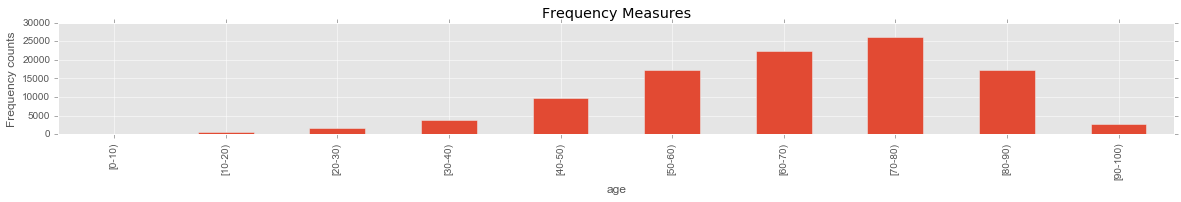

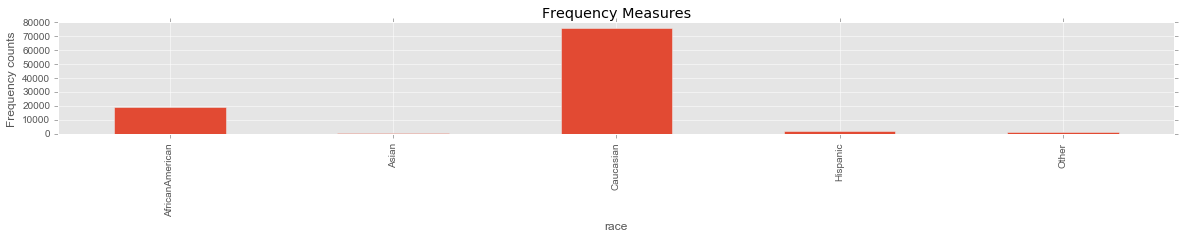

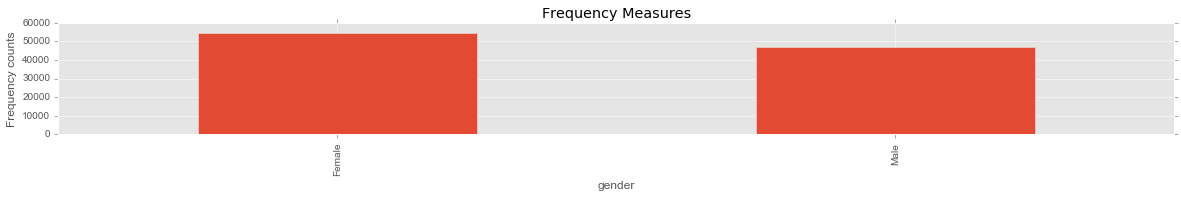

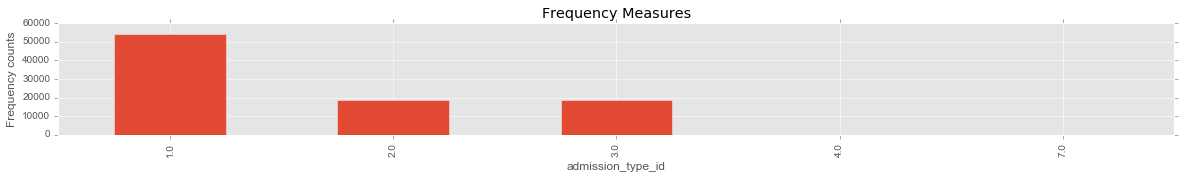

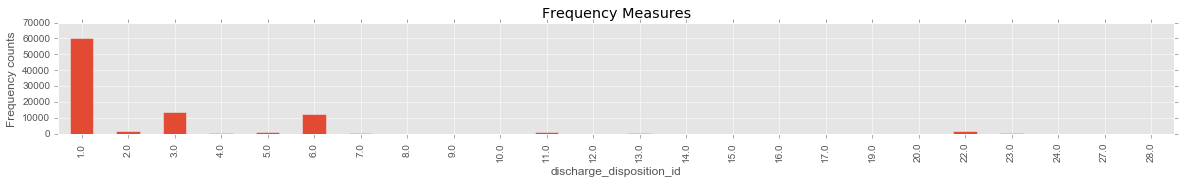

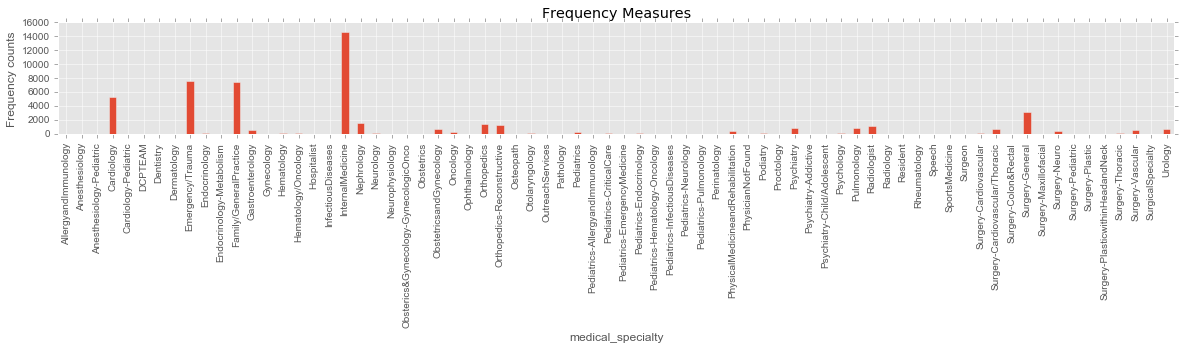

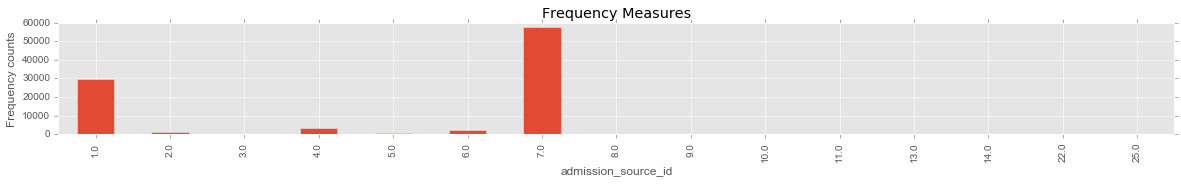

In [502]:
grouping_elements = ["age", "race", "gender", "admission_type_id", "discharge_disposition_id", 
                     "medical_specialty", "admission_source_id"]
i = 0
for group in grouping_elements:
    i += 1
    grouped_object = clean_diabetes.groupby([group])
    group_size = grouped_object.size()
    sub_plot = pd.DataFrame(group_size).plot.bar(figsize=(20, 2), legend = None)
    sub_plot.set_xlabel(group)
    sub_plot.set_ylabel("Frequency counts")
    sub_plot.set_title("Frequency Measures")
plt.show()

##### Demographic Influence: Age, Gender and Race

The maximum diabetics in this database are in the age group of 70-80 years, closely followed by the age group of people in the group of 60-70 years.
Gender does not seem to influence the probability of occuerence of diabetes 
Alarmingly, it is observed that Caucasions have the highest chance of coming in with a diabetic disease.

##### Admission Type and Source & Discharge Disposition

Most diabetics come in as Emergency admits (code 1) and almost all others have an equal likelihood to be admitted as Urgent (code 2) or Elective (code 3). Since most come in as emergency admits, it is cross validated that the most frequent admission sources are Emergency rooms (code 7) and are then followed by Physician referral (code 1).

We can safely conclude that most patients which come in stabilize before they are discharged. As can be seen from the plot, most of them are discharged to home (code 1). Almost equal proportion of patients are discharged/transferred to SNF (code 3), discharged/transferred to home with home health service (code 6).

##### Medical Specialty 

As can be seen from the plot, most patients are grouped in the internal medicine care, followed by emergency/trauma or family/general practice. 

Since most patients came in as emergency visits, but not all of them are admitted in the emergency/trauma division of the hospital care, we can safely say that even though patients come in an emergency, it is mostly in internal medical care. But, there is not enough evidence yet. Let us explore this aspect further.

### Exploring time in hospital

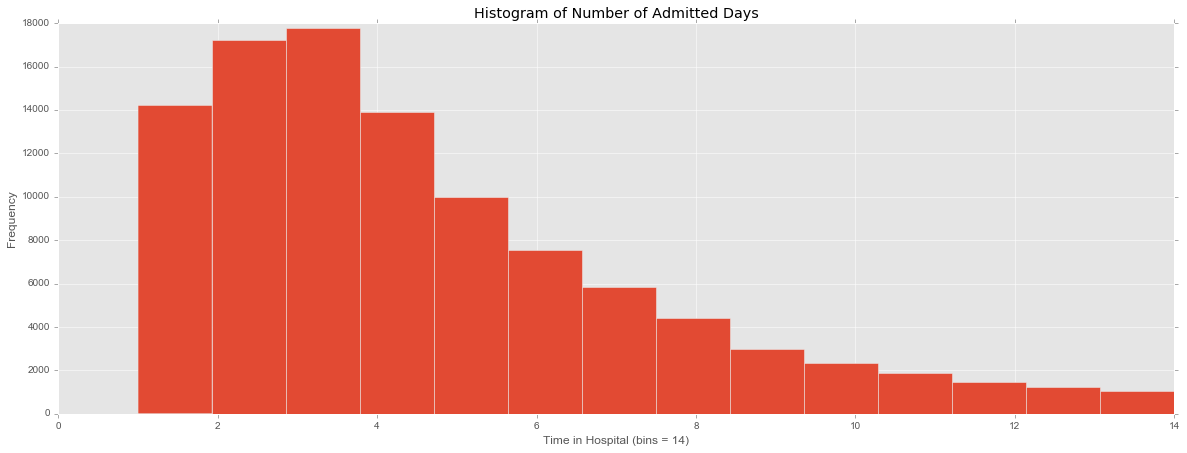

In [503]:
bins = 14
plot_time = clean_diabetes['time_in_hospital'].plot.hist(bins=bins, figsize=(20, 7),
                                             title = "Histogram of Number of Admitted Days")
plot_time.set_xlabel('Time in Hospital (bins = {})'.format(bins))

This shows that maximum people are admitted for a duration of 3 days. This data is right skewed showing that the maximum admissions are for a smaller duration of time. Despite the fact that most admitted patients are admitted in an emergency condition.

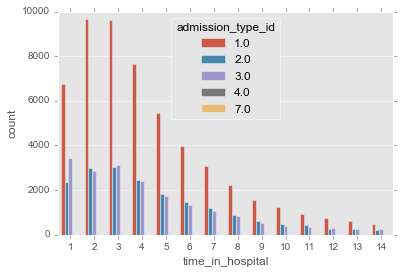

In [504]:
plt.plot(figsize=(10, 3))
sns.countplot(x="time_in_hospital", hue="admission_type_id", data=clean_diabetes)

Patients who were brought in an emergency (admission_type_id = 1) were in the hospital for a maximum duration of 2 or 3 days. That means that despite an emeregency they were discharged early. Let us check if this was actually a discharge or these people 

## Correlations

### Pearson Correlation

A coefficient is simply a number that describes the relationship between two variables. The [Pearson correlation coefficient](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) measures the *linear* correlation between two variables as a value between -1 and 1. The closer the value to 1, the more linearly correlated the two variables are; if the coefficient is close to -1, this implies that the two variables are inversely linearly related (as one variable increases the other decreases, for example). The direction of the relationship is not implied, unlike a regression which implies that _y_ is a function of _x_.

Mathematically, the Pearson correlation coefficient is computed as the covariance of the two variables divided by the product of their standard deviations:

$$p = \frac{cov(X, Y)}{\sigma_x \sigma_y}$$

Finding the columns with numeric types to find the correlations

In [505]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
diabetic_nums = clean_diabetes.select_dtypes(include=numerics).iloc[:, 1:-1]
print diabetic_nums.columns

Index([u'patient_nbr', u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'num_lab_procedures',
       u'num_procedures', u'num_medications', u'number_outpatient',
       u'number_emergency', u'number_inpatient'],
      dtype='object')


We will not analyze the coded ids for correlations because actually they are categorical

In [506]:
corr_columns = ["time_in_hospital", "num_lab_procedures","num_procedures", "num_medications", "number_outpatient",
       "number_emergency", "number_inpatient"]
diabetics_corr = clean_diabetes[corr_columns]
corr = diabetics_corr.corr()
corr

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000


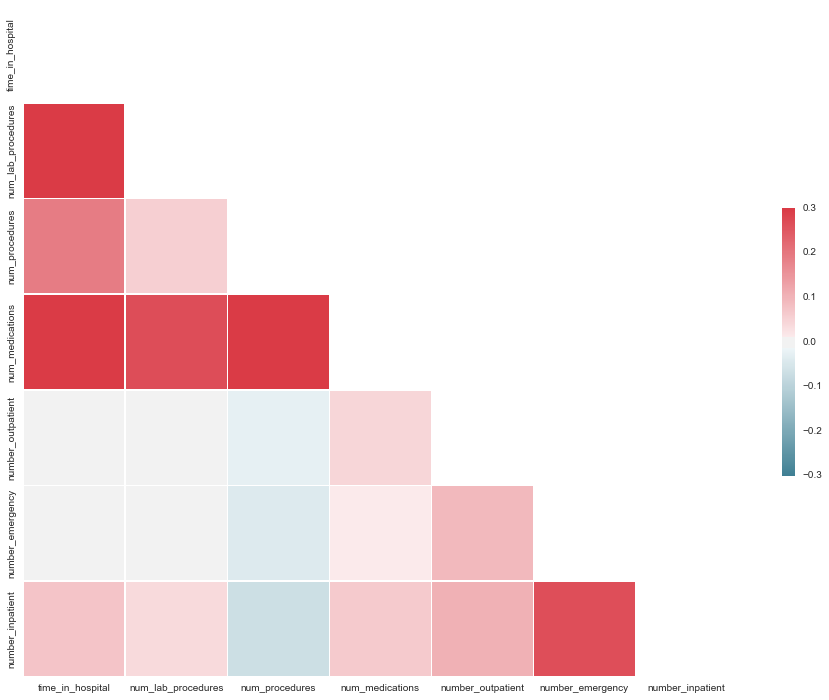

In [507]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, linewidths=0.5, cbar_kws={"shrink": 0.4}, ax=ax)

The above correlation plot shows that the longer a patient is admitted in the hospital, more the number of lab procedures which are performed on these patinets and they are provided with that many more medications. This makes sense as they were admitted for a longe duration. Number of procedures performed on a patient are also directly correlated to the number of medicines given to them.

Number of procedures are inversely correlated to the number of people who were admitted. i.e. number of inpatinets in the faicility.

Correlation results did not give any insights as such.

## Histogram of all numeric data fields

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1cd07dfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1db8ba050>]], dtype=object)

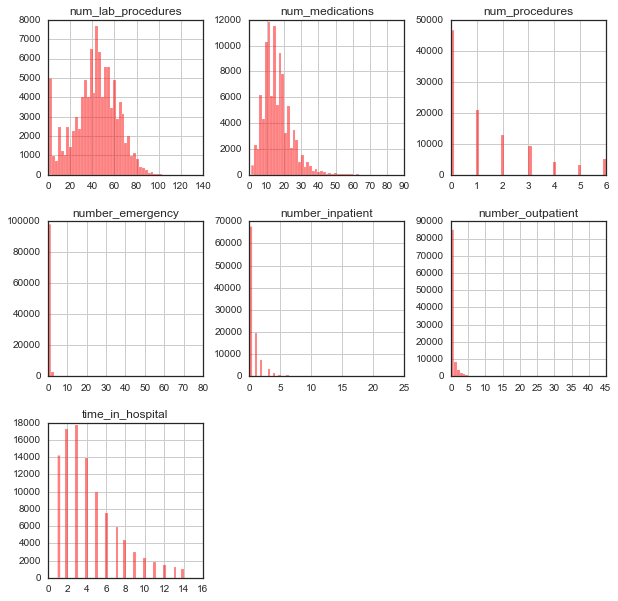

In [508]:
diabetics_corr.hist(color="red", alpha=0.5, bins=50,figsize=(10,10))

We can see that most numeric fields are normally distributed with right skewness. Number of lab procedures are normally distributed with a mean of about 50.

## Multi-scatter plots

(101766, 11)


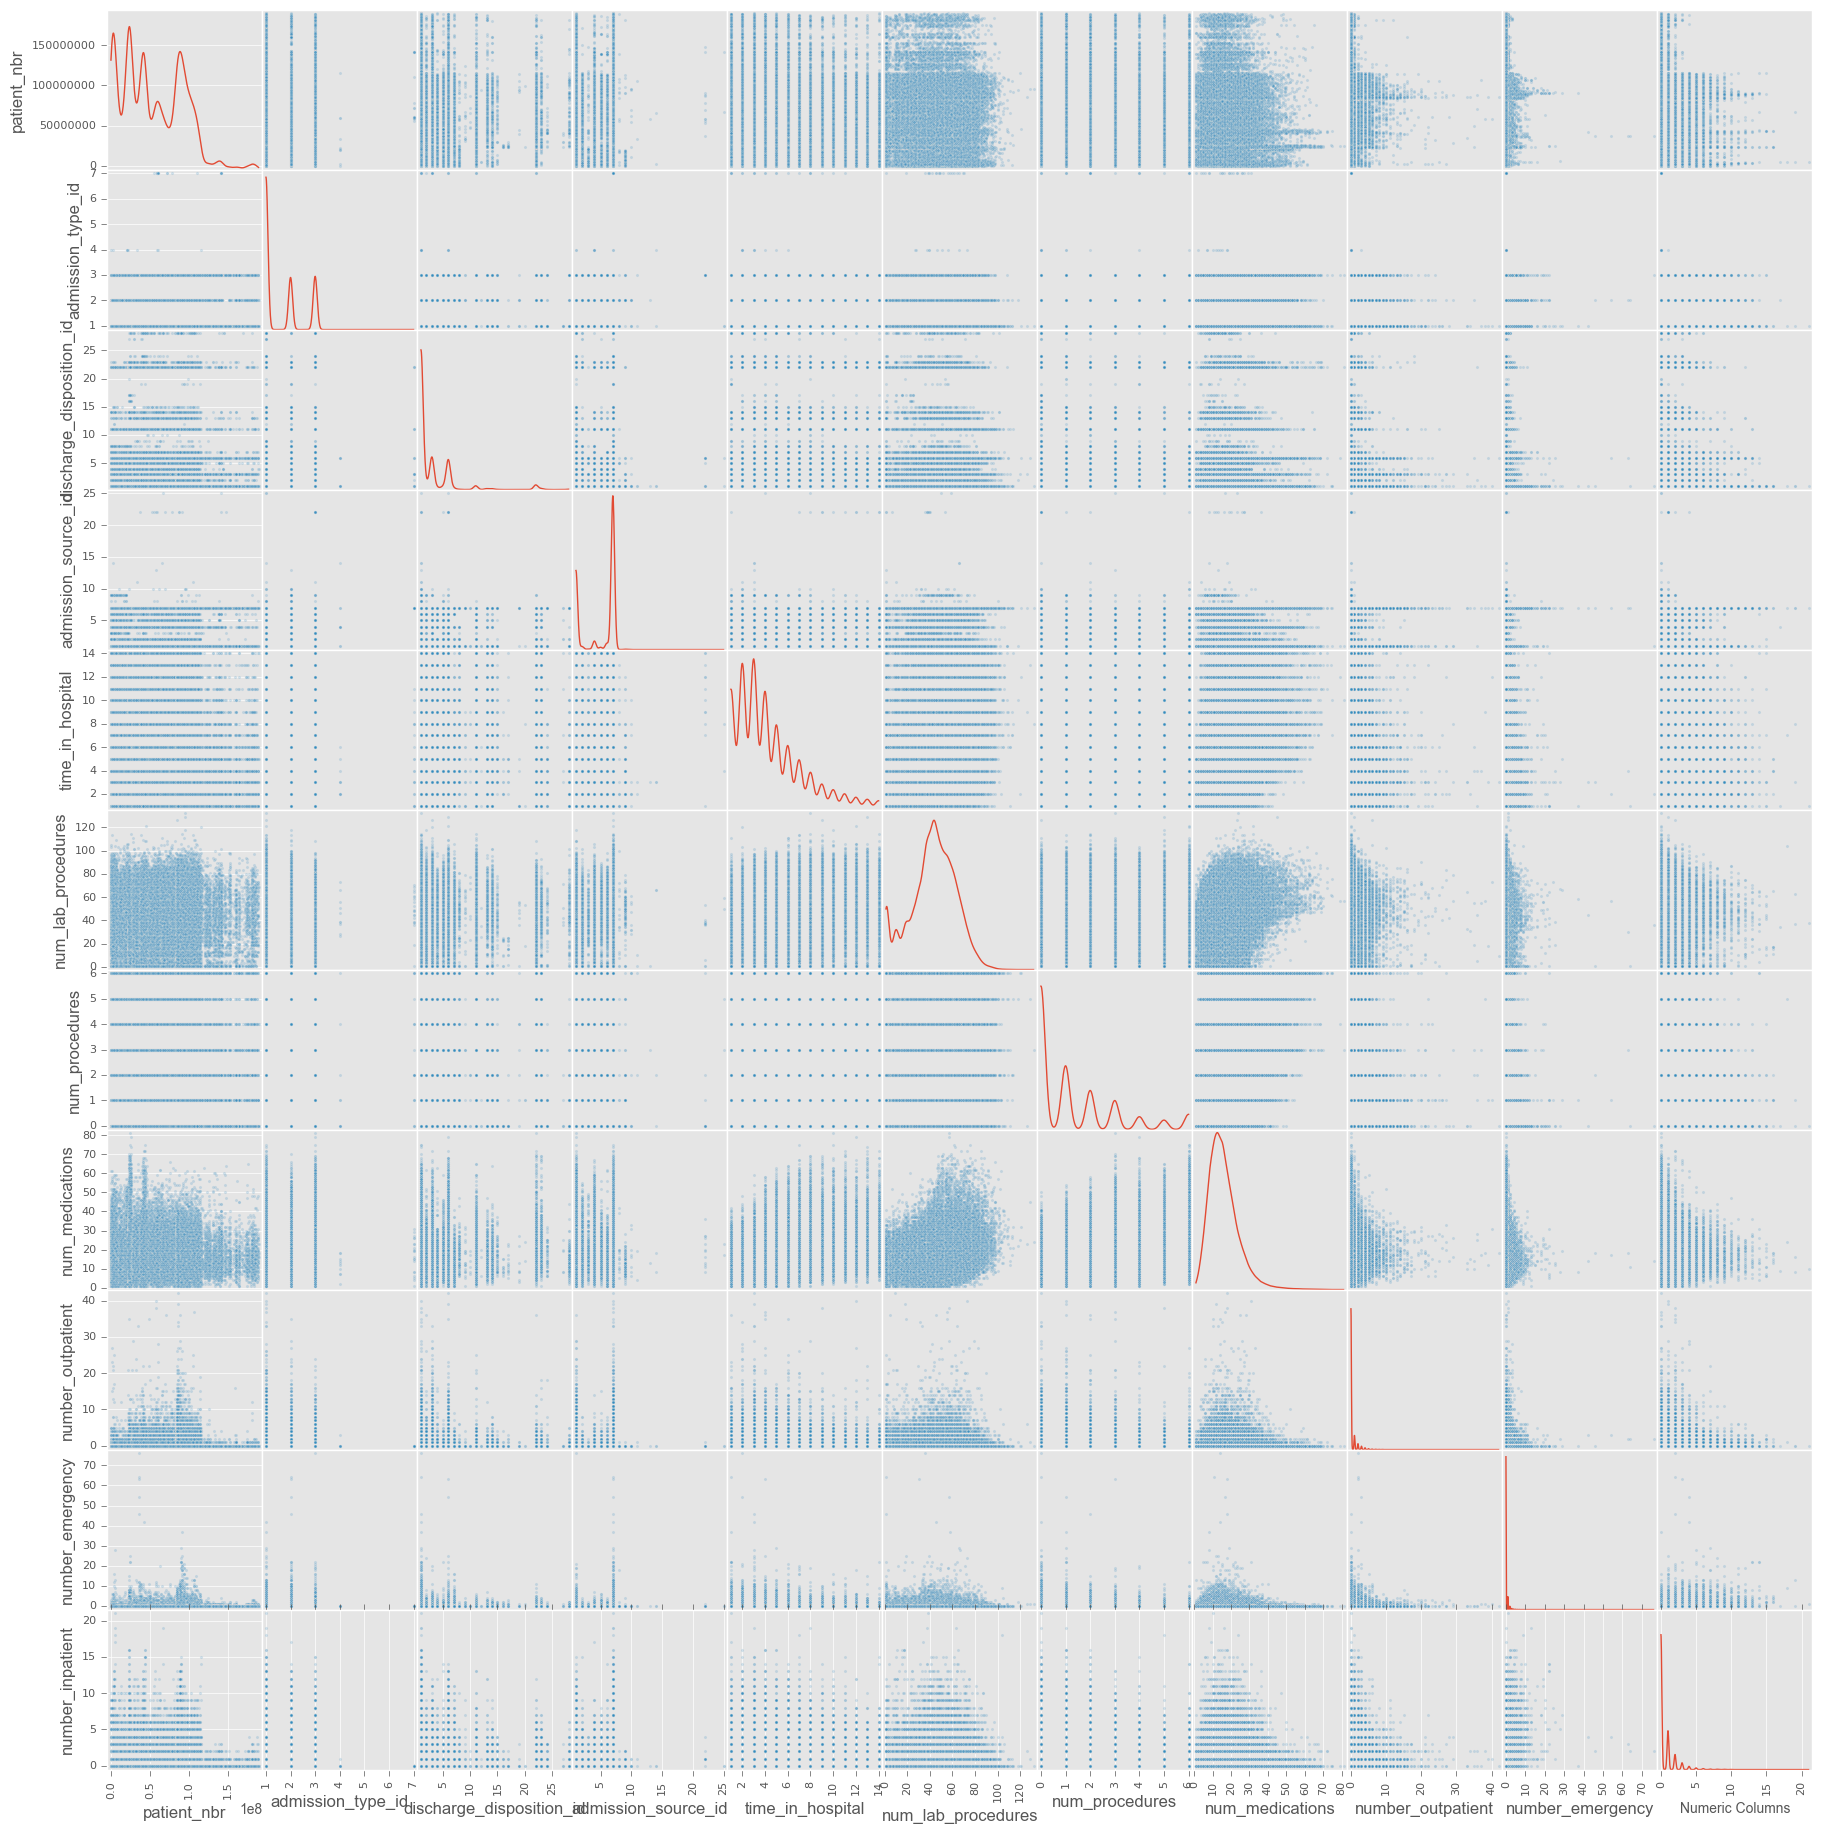

In [509]:
sns.reset_orig()
plt.style.use('ggplot')
subset = diabetic_nums.shape
print subset
pplot = pd.scatter_matrix(diabetic_nums, figsize=(22, 22), alpha=0.2, diagonal='kde')
plt.xlabel("Numeric Columns", fontsize=10)
plt.ylabel("Numeric Columns", fontsize=10)

No evident pattern is seen from the paired plots. Hence, we can not make any conclusions based on this.

Number of medications are normally distributed but right skewed.

## Box Plots

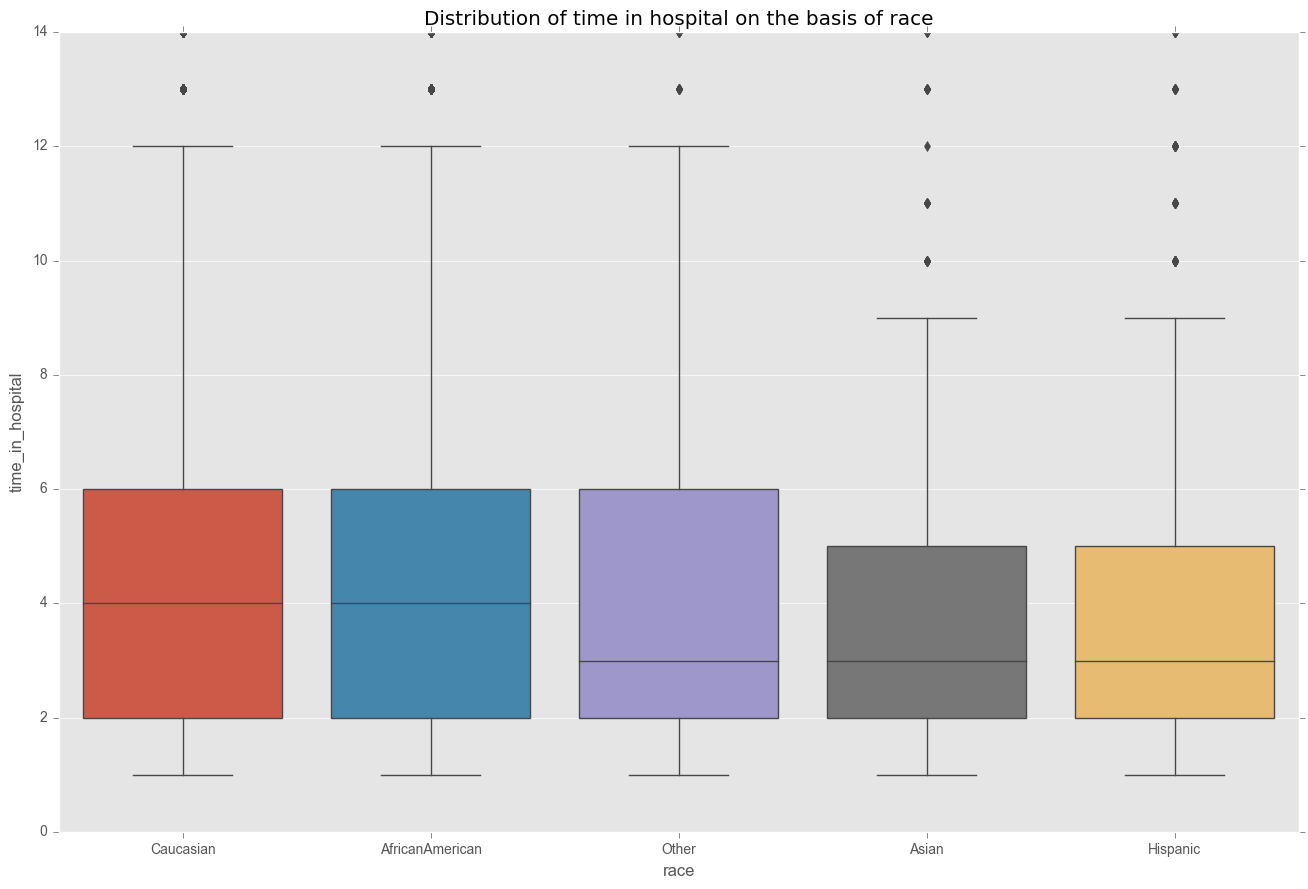

In [510]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = "race", y = "time_in_hospital", data=clean_diabetes)
ax.set(title='Distribution of time in hospital on the basis of race')

There seems to be no significant difference in the number of days a person is admitted in a hospital and the race of a person


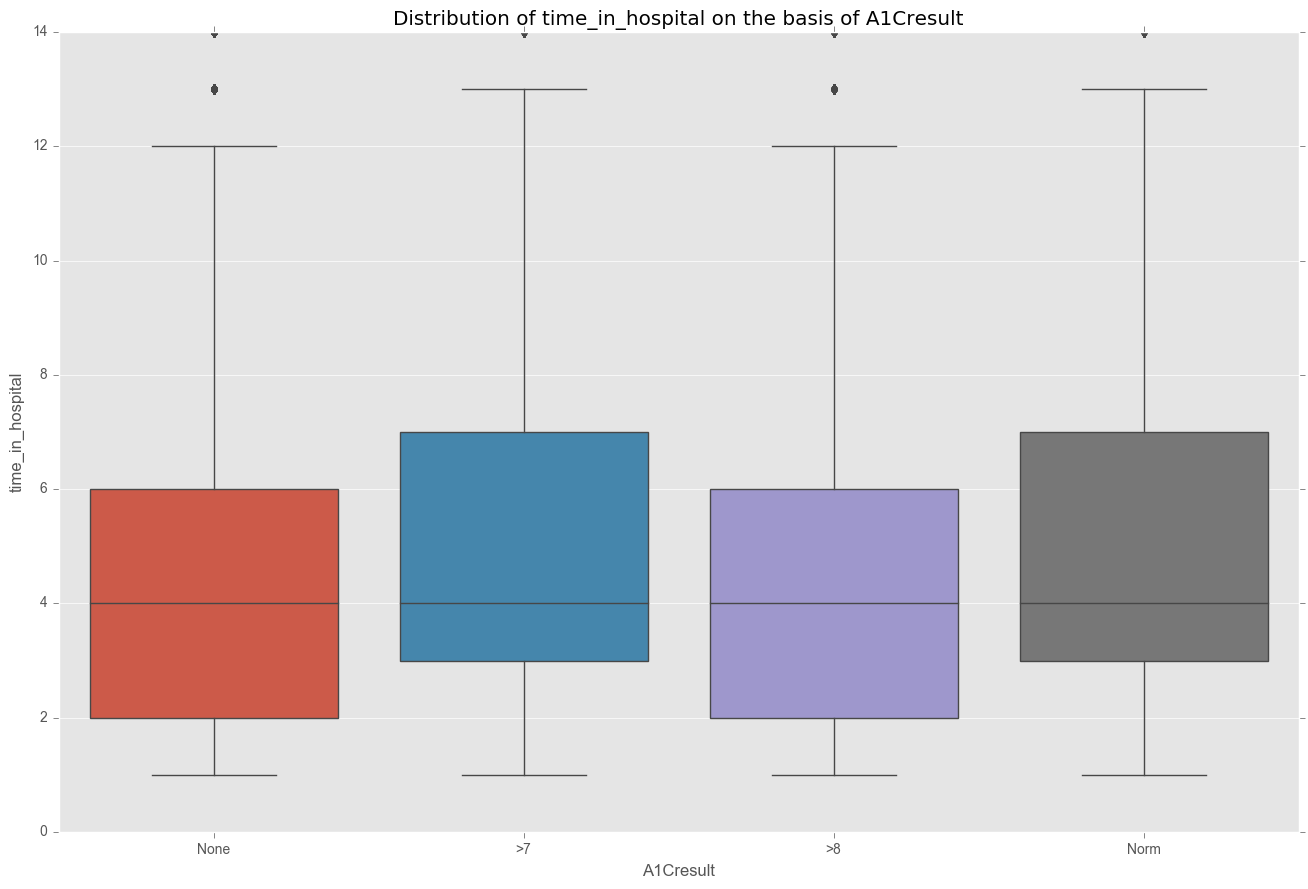

In [511]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = "A1Cresult", y = "time_in_hospital", data=clean_diabetes)
ax.set(title='Distribution of time_in_hospital on the basis of A1Cresult')

There seems to be no significant difference in the number of days a person is admitted in a hospital and the A1c results of a person

# Statistical Analysis

A Chi-squared is a measurement of how well particular variables match a probability distrbution and it is typically applied to categorical data. It does not use values but rather counts (or frequencies) within each category, and it assumes that variables are independent and normally distributed, although in practice these assumptions are often ignored (sometimes with good cause and sometimes not). It also assumes that all the expected counts are greater than 5.

## Chi2 Test 

#### Test for Independence

The chi-squared test for independence is used to test whether two categorical variables are dependent or independent. This is the "version of chi-squared" used in scikit-learn to perform feature selection. The classical scenario here is to test whether sex (male or female) or race is _independent_ of political party preference (democrat or republican). Notice how each of these variables is categorical. The test for independence also uses counts, and what is known as a contingency table.

*TEST I- Independence between A1c Results and age*

In [512]:
a1c_values = clean_diabetes[["A1Cresult"]]
a1c_values.groupby("A1Cresult").size()

#Adding age to this dataframe
a1c_values.loc[:,"age"]=clean_diabetes.loc[:, "age"]
print a1c_values.sample(10, replace=False)

observed_tab = pd.crosstab(a1c_values["A1Cresult"], a1c_values["age"], margins=True)
observed_tab

      A1Cresult      age
95774      None  [40-50)
70941      Norm  [60-70)
21361      None  [80-90)
53547      None  [60-70)
42474        >7  [70-80)
87632      None  [60-70)
26798      None  [60-70)
94705      None  [80-90)
46609      None  [80-90)
15795      None  [40-50)


age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),All
A1Cresult,,,,,,,,,,,
>7,2,14,30,92,331,623,866,1042,706,106,3812
>8,82,280,334,600,1289,1834,1684,1330,693,90,8216
None,68,341,1209,2881,7489,13871,18939,22522,14955,2473,84748
Norm,9,56,84,202,576,928,994,1174,843,124,4990
All,161,691,1657,3775,9685,17256,22483,26068,17197,2793,101766


In [513]:
contingency_table = observed_tab.iloc[0:5, 0:2]
contingency_table
chi2_contingency(contingency_table)

(6.2159924254315193,
 0.18358805871696754,
 4,
 array([[   3.02347418,   12.97652582],
        [  68.40610329,  293.59389671],
        [  77.28755869,  331.71244131],
        [  12.28286385,   52.71713615],
        [ 161.        ,  691.        ]]))

**Hypothesis Result**: - Since p-value is greater than 0.05, we accept the null hypotheses that A1Cresult and age are independent of each other.

*TEST II- Independence between A1c Results and race*

In [514]:
a1c_race = clean_diabetes[["A1Cresult"]]
a1c_race.groupby("A1Cresult").size()
a1c_race.loc[:,"race"] = clean_diabetes.loc[:,["race"]]
print a1c_race.head()

  A1Cresult             race
0      None        Caucasian
1      None        Caucasian
2      None  AfricanAmerican
3      None        Caucasian
4      None        Caucasian


In [515]:
observed_tab = pd.crosstab(a1c_race["A1Cresult"], a1c_race["race"], margins=True)
observed_tab
contingency_table = observed_tab.iloc[0:5, 0:2]
contingency_table

chi2_contingency(contingency_table)

(15.751339090214861,
 0.0033716407930721917,
 4,
 array([[   575.787114  ,     19.212886  ],
        [  1845.4218931 ,     61.5781069 ],
        [ 15682.69910836,    523.30089164],
        [  1106.09188454,     36.90811546],
        [ 19210.        ,    641.        ]]))

**Hypothesis Result**: - Since p-value is much smaller than 0.05, we reject the null hypotheses that A1Cresult and race are independent of each other. That means the A1c score is indeed dependent on the race of the patient.

## ANOVA

The final statistic we will explore is ANOVA (Analysis of Variance). An ANOVA test compares the numeric values of multiple groups to help determine whether the values across groups are different. It does this by comparing the means of each group. There are several flavors of ANOVA, each suited for a different purpose:

1. One-way ANOVA: determines interaction of single independent categorical variable on a single dependent variable.

2. Two-way ANOVA: determines interaction of two independent categorical variables on a single dependent variable.

*Test III: Test whether the time spent in hospital between the 8 different types of admit groups is different across the way patients were admitted*

In [516]:
admission_type1 = clean_diabetes[clean_diabetes['admission_type_id'] == 1]['time_in_hospital']
admission_type2 = clean_diabetes[clean_diabetes['admission_type_id'] == 2]['time_in_hospital']
admission_type3 = clean_diabetes[clean_diabetes['admission_type_id'] == 3]['time_in_hospital']
admission_type4 = clean_diabetes[clean_diabetes['admission_type_id'] == 4]['time_in_hospital']
admission_type7 = clean_diabetes[clean_diabetes['admission_type_id'] == 7]['time_in_hospital']

In [517]:
f_oneway(admission_type1, admission_type2, admission_type3, admission_type4,admission_type7)

F_onewayResult(statistic=27.060801759093735, pvalue=1.778343395106679e-22)

**Hypothesis Result**: - The p-value of 1.778343395106679e-22 is < 0.05, so we reject the null hypothesis and conclude that the time spent in hospital between the different types of admit groups is different.

*Test IV: Test whether the time spent in hospital between the 8 different medical specialties is different across groups*

In [518]:
specialty_type1 = clean_diabetes[clean_diabetes['medical_specialty'] == 'InternalMedicine']['time_in_hospital']
specialty_type2 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Psychiatry']['time_in_hospital']
specialty_type3 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Emergency/Trauma']['time_in_hospital']
specialty_type4 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Pulmonology']['time_in_hospital']
specialty_type5 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Urology']['time_in_hospital']
specialty_type6 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Cardiology']['time_in_hospital']
specialty_type7 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Family/GeneralPractice']['time_in_hospital']
specialty_type8 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Surgery-General']['time_in_hospital']
specialty_type9 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Nephrology']['time_in_hospital']
specialty_type10 = clean_diabetes[clean_diabetes['medical_specialty'] == 'Orthopedics']['time_in_hospital']

f_oneway(specialty_type1,specialty_type2,specialty_type3,specialty_type4,specialty_type5,
         specialty_type6,specialty_type7,specialty_type8,specialty_type9,specialty_type10)

F_onewayResult(statistic=130.04674253293857, pvalue=6.1300426046739457e-243)

**Hypothesis Result**: - The P-value is much less than 0.05 and approximately equal to zero. so we reject the null hypothesis and conclude that the time spent in hospital between the 8 different medical specialties is different across groups.

# Results

This dataset contained the diabetic patients which showed that most patients are in the age group of 70-80 years of age, followed by patients aged 60-70 years.

Most diabetics belonged to the race Caucasian. Gender was almost equally represented amongst these patients. 

Maximum patients came in as an emergency.

We also noticed that the A1Cresult, race and age are independent of each other. The time spent in hospital by different admit groups is different and so is the time spent by patients admitted under different medical specialities.